# Assignment 1: Pranoramic Image Stitching

## Part 1: 2D Convolution

In [1]:
import cv2 
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');
    

In [3]:
def conv2d(img: np.array, kernel: np.array) -> np.array:
    """
    Take a 2D image and a given kernel, perform convolution operation.
    
    Parameters
    ----------
        `img`    (`np.array`): input image
        `kernel` (`np.array`): convolution kernel
    
    Returns
    -------
        `np.array`: the output image
    """

    # Calculate the output image shape (assuming 0 padding, stride 1)
    w_k = kernel.shape[0]
    h_k = kernel.shape[1]
    w_out = np.floor((img.shape[0] - w_k)).astype(int) + 1
    h_out = np.floor((img.shape[1] - h_k)).astype(int) + 1
    # Create a output image filled by zeros
    img_out = np.zeros(shape=(w_out, h_out))
    
    # Perform convolution
    for i in range(w_out):
        for j in range(h_out):
            mat = img[i:i+w_k, j:j+h_k]
            img_out[i, j] = np.sum(np.multiply(mat, kernel))
            
    return img_out


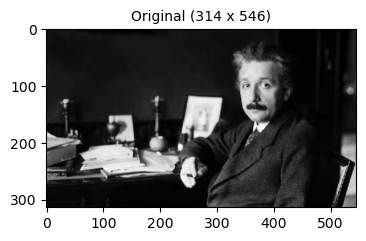

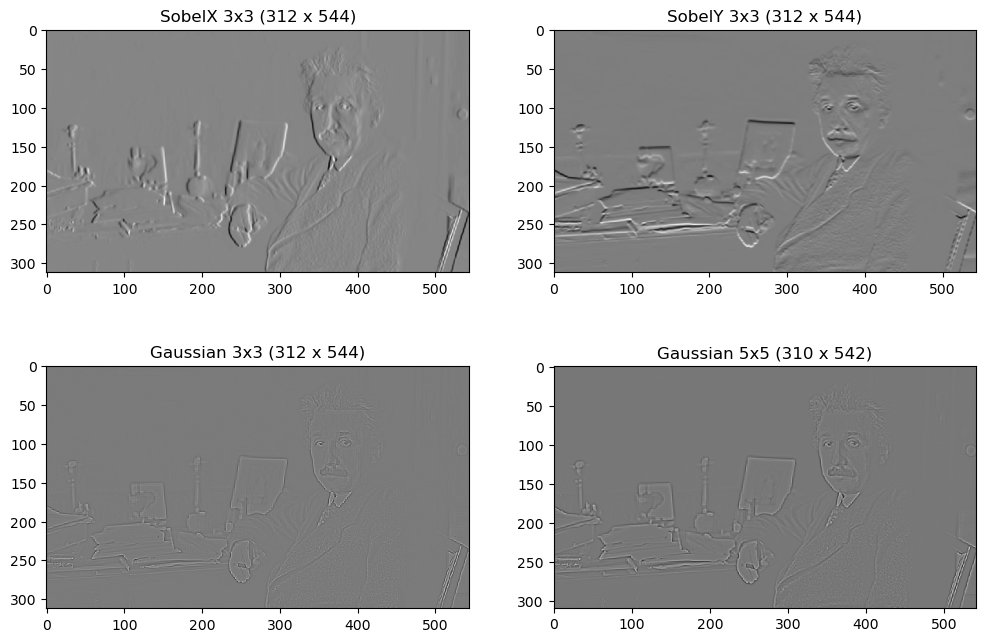

In [20]:
# Read the input image as a grayscale image
img = Image.open('images/einstein.png')
img = ImageOps.grayscale(img)

# Define some kernels
sobel_x = np.array([
    [ 1,  0, -1],
    [ 2,  0, -2],
    [ 1,  0, -1]
])
sobel_y = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])
gaussian_3_3 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])
gaussian_5_5 = np.array([
    [ 0,  0, -1,  0,  0],
    [ 0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
    [ 0, -1, -2, -1,  0],
    [ 0,  0, -1,  0,  0]
])

# Apply kernels to the input image
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray');
plt.title('Original (%d x %d)' %(np.array(img).shape[0], np.array(img).shape[1]), fontsize=10)
_, ax = plt.subplots(2, 2, figsize=(12, 8))

# Sobel
img_sobel_x = conv2d(img=np.array(img), kernel=sobel_x)
ax[0][0].imshow(img_sobel_x, cmap='gray')
ax[0][0].title.set_text('SobelX 3x3 (%d x %d)' %(img_sobel_x.shape[0], img_sobel_x.shape[1]))
img_sobel_y = conv2d(img=np.array(img), kernel=sobel_y)
ax[0][1].imshow(img_sobel_y, cmap='gray')
ax[0][1].title.set_text('SobelY 3x3 (%d x %d)' %(img_sobel_y.shape[0], img_sobel_y.shape[1]))

# Gaussian
img_gauss_3 = conv2d(img=np.array(img), kernel=gaussian_3_3)
ax[1][0].imshow(img_gauss_3, cmap='gray')
ax[1][0].title.set_text('Gaussian 3x3 (%d x %d)' %(img_gauss_3.shape[0], img_gauss_3.shape[1]))
img_gauss_5 = conv2d(img=np.array(img), kernel=gaussian_5_5)
ax[1][1].imshow(img_gauss_5, cmap='gray')
ax[1][1].title.set_text('Gaussian 5x5 (%d x %d)' %(img_gauss_5.shape[0], img_gauss_5.shape[1]))

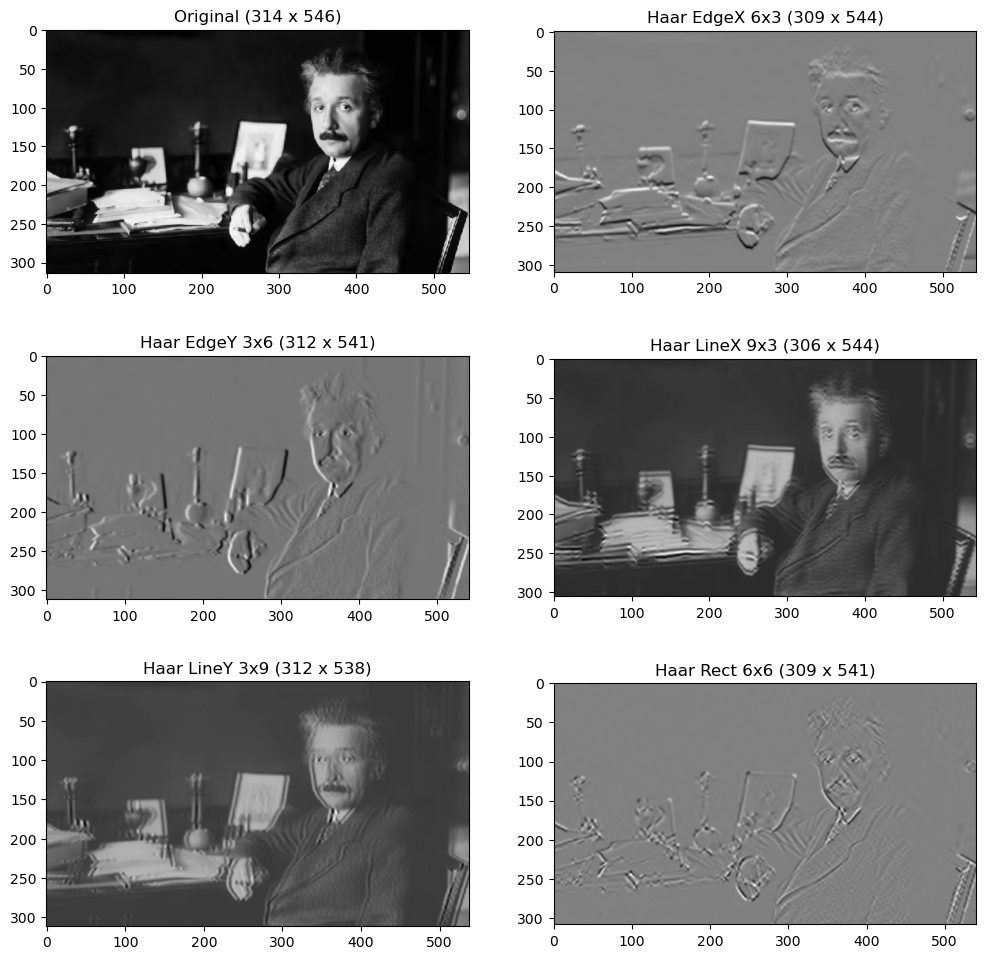

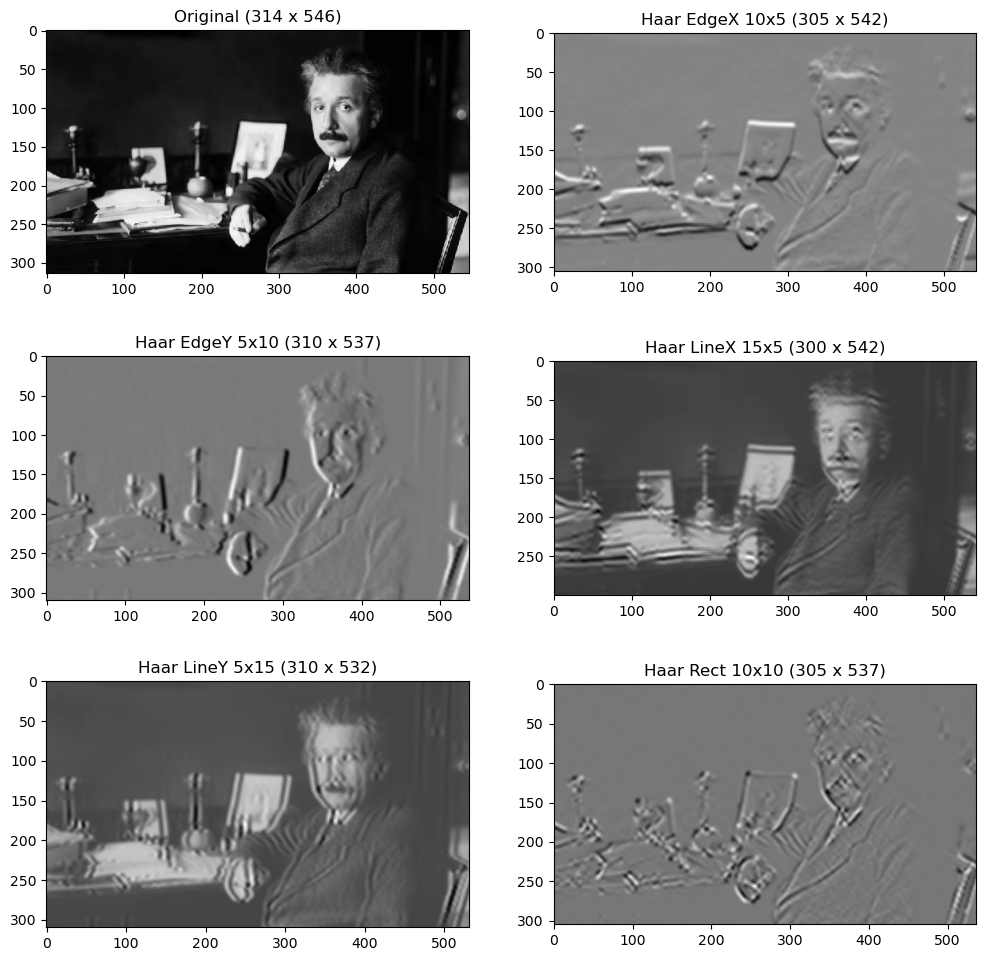

In [21]:
def haar_kernel(style: int = 2, axis: int = 0, scale: int = 1) -> np.array:
    """
    Take a 2D image and a given kernel, perform convolution operation.
    
    Parameters
    ----------
        `style` (`int`): type of kernel, 0 for edge, 1 for line', and 2 for four-rect feature
        `axis`  (`int`): for kernel type 0 and 1, this is the axis of the target feature
        `scale` (`int`): scale of the kernel
    
    Raises
    ------
        `RuntimeWarning`: If there is no corresponding cell, the map file might contain illegal characters.
    
    Returns
    -------
        `np.array`: the output haar-like kernel
    """

    if scale < 1:
        raise RuntimeWarning('Invalid scale input. Please use an int larger than 0.')
    
    # When using edge feature kernel
    if style == 0:
        kernel = np.ones((2*scale, 1*scale), dtype=int)
        kernel[0:scale, :] = -1
    # When using line feature kernel
    elif style == 1:
        kernel = np.ones((3*scale, 1*scale), dtype=int)
        kernel[1*scale:2*scale, :] = -1
    # When using four rectangle feature kernel
    else:
        kernel = np.ones((2*scale, 2*scale), dtype=int)
        kernel[0:scale, 0:scale] = -1
        kernel[scale:, scale:] = -1
        
    # Transpose if the desired feature axis is 1
    if axis == 1:
        return kernel.transpose()
    else:
        return kernel

def plot_haar_results(img: np.array, scale: int = 1) -> None:
    """
    Plot the results of applying Haar-like kernels to the original image.
    
    Parameters
    ----------
        `img` (`np.array`): input image
        `scale` (`int`): scale of the kernels
    
    Returns
    -------
        `none`: 
    """
    
    # Original image
    _, ax = plt.subplots(3, 2, figsize=(12, 12))
    ax[0][0].imshow(np.array(img), cmap='gray')
    ax[0][0].title.set_text('Original (%d x %d)' %(np.array(img).shape[0], np.array(img).shape[1]))

    # Edge Feature
    img_haar_1 = conv2d(img=np.array(img), kernel=haar_kernel(style=0, axis=0, scale=scale))
    ax[0][1].imshow(img_haar_1, cmap='gray')
    ax[0][1].title.set_text('Haar EdgeX %dx%d (%d x %d)' %(2*scale, 1*scale, img_haar_1.shape[0], img_haar_1.shape[1]))
    img_haar_2 = conv2d(img=np.array(img), kernel=haar_kernel(style=0, axis=1, scale=scale))
    ax[1][0].imshow(img_haar_2, cmap='gray')
    ax[1][0].title.set_text('Haar EdgeY %dx%d (%d x %d)' %(1*scale, 2*scale, img_haar_2.shape[0], img_haar_2.shape[1]))
    # Line Feature
    img_haar_3 = conv2d(img=np.array(img), kernel=haar_kernel(style=1, axis=0, scale=scale))
    ax[1][1].imshow(img_haar_3, cmap='gray')
    ax[1][1].title.set_text('Haar LineX %dx%d (%d x %d)' %(3*scale, 1*scale, img_haar_3.shape[0], img_haar_3.shape[1]))
    img_haar_4 = conv2d(img=np.array(img), kernel=haar_kernel(style=1, axis=1, scale=scale))
    ax[2][0].imshow(img_haar_4, cmap='gray')
    ax[2][0].title.set_text('Haar LineY %dx%d (%d x %d)' %(1*scale, 3*scale, img_haar_4.shape[0], img_haar_4.shape[1]))
    # Four-rectangle Feature
    img_haar_5 = conv2d(img=np.array(img), kernel=haar_kernel(style=2, axis=0, scale=scale))
    ax[2][1].imshow(img_haar_5, cmap='gray')
    ax[2][1].title.set_text('Haar Rect %dx%d (%d x %d)' %(2*scale, 2*scale, img_haar_5.shape[0], img_haar_5.shape[1]))
    
    return

# Plot results of different scales
plot_haar_results(img, scale=3)
plot_haar_results(img, scale=5)

### Part 1 Conclusion

#### 1. Sobel Kernels
After applying the two Sobel kernels (one designed for feature along the x-axis and one for features along the y-axis) to the image, the edge features become more visible and stand out from the rest of the iamge. It can be observed that by applying the Sobel X kernel, the 

#### 2. Gaussian Kernels

#### 3. Haar-like Kernels

#### 4. Kernel Size

## Part 2: SIFT Features and Descriptors